

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> **Questions**
>><ul> 
    <li>Which genres are most popular from year to year ?
    <li>What kinds of properties are associated with movies that have high revenues ?
    <li>What is the highest profit movie for each year ?
    <li>What is most popular movie ?
    <li>What are highest 10 budgets of movies ?
    <li>What are the revenue of highest 10 budgets of movies ?
    <li>What are Average counts of movies people votes from year to year ?
    <li>What are runtime of the highest and lowest 5 profit movies ?
    <li>Who are the highest and lowest movies number directors ?
    <li>What are the movies have high vote rate average ?
    </ul>
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# read dataset and show first 5 rows
df = pd.read_csv('tmdb-movies.csv')
# df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#show dataset information 
df.info()
print (df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

we see that we have 10866 row and 21 coloumns but the data need to clean and preprocessing

In [4]:
#Let's count the null rows using isnull() and sum() function
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

we will strat by delete unusfuel columns 
i think id , imdb_id , homepage , tagline , keywords and overview columns are not useful for analysis so these columns could be droped from the data frame.

In [5]:
df.drop(['id','imdb_id','homepage','tagline' , 'keywords','overview'] , axis=1 , inplace=True)

may be we will use production companies in analysis and we cant fill null values by mode or mean so we will give zero to the null values 

In [6]:
df['production_companies'].fillna(0,inplace = True)

we can drop rows have null values of genres and cast and director because its count is small but im afraid if any of this rows has important movie so we will make the same of production_companies column

In [7]:
df.replace(np.nan,0,inplace=True)

In [8]:
sum(df.duplicated())

1

In [9]:
#Let's drop these row using 'drop_duplicates()' function
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.3+ MB


finally of this step we now have cleaned and ready data to start the analysis however there is no categorical fileds so we dont need to encoding any coloumns

<a id='eda'></a>
## Exploratory Data Analysis

In [11]:
# describe the data after making preprocessing
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


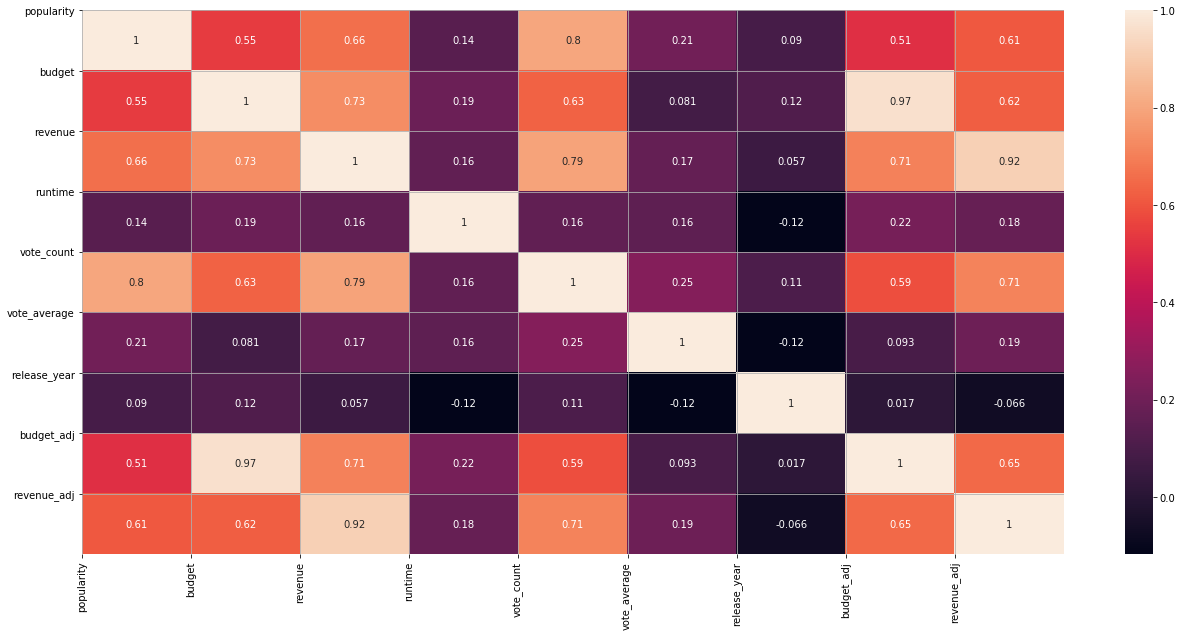

In [12]:
#show the correlation to know some information to start the analysis
corr = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
# ax.matshow(corr)
sns.heatmap(corr,annot=True)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.grid(True)
plt.show()

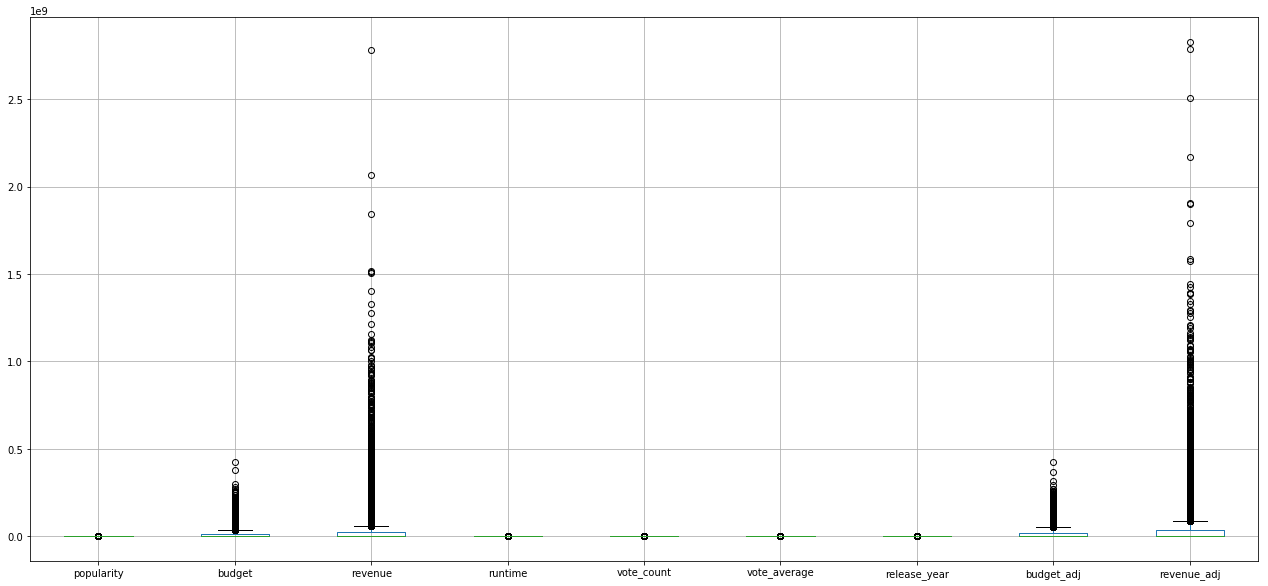

In [13]:
df.boxplot(figsize=(22, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13d1966198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f13d1338550>]], dtype=object)

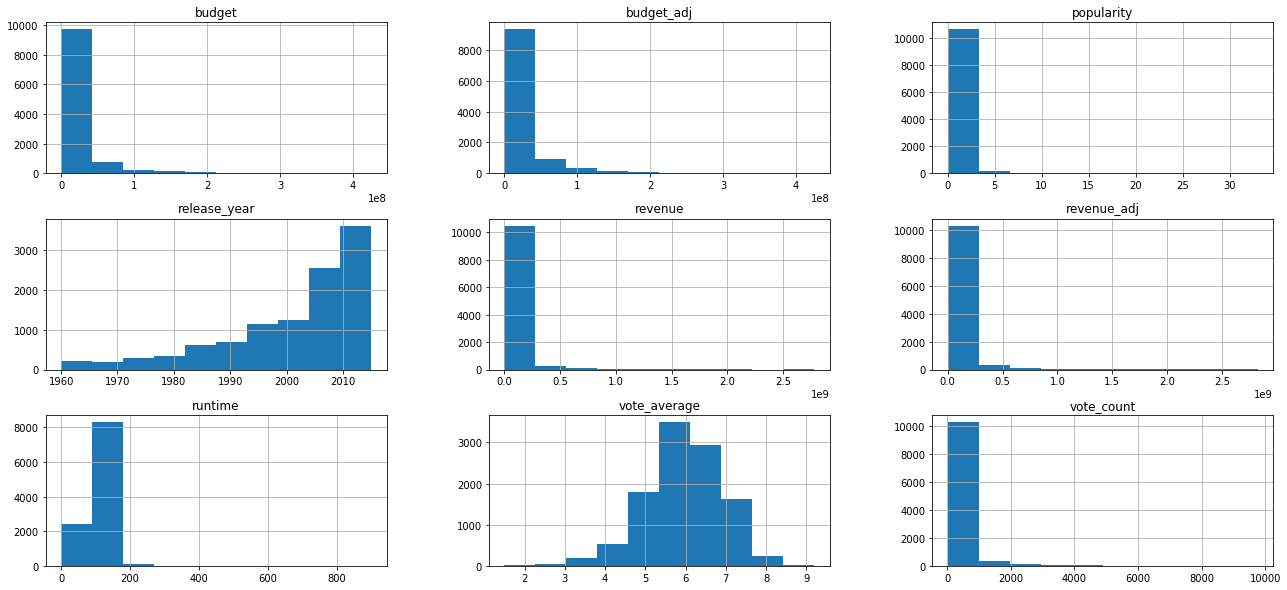

In [14]:
df.hist(figsize=(22, 10))

all of this visulaziations ta take a look before start answring the questions :)

### Research Question 1 (Which genres are most popular from year to year ?)

In [15]:
df1 = df.loc[df.groupby("release_year")["popularity"].idxmax()]
df1[['release_year','genres']].sort_values(by=['release_year'],ascending=False).head()

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller
629,2014,Adventure|Drama|Science Fiction
5422,2013,Animation|Adventure|Family
4361,2012,Science Fiction|Action|Adventure
3371,2011,Action|Animation|Horror


we can split genres by | but i think we search about group of genres together to make the movie compatible

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [16]:
# To get movies with highest revenues i took highest 20 Revenues
df2=df.nlargest(20,['revenue'])
df2[['original_title','revenue']].head()

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810


### Research Question 3  (What is the highest profit movie for each year?)

In [18]:
#Before answering this question , lets figure out the profits of each movie
df['profit'] = df['revenue']-df['budget']
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [19]:
df3 = df.loc[df.groupby("release_year")["profit"].idxmax()]
df3 = df3[['release_year','profit','original_title']].sort_values(by=['release_year'],ascending=False)
df3.head(10)


,release_year,profit,original_title
3,2015,1868178225,Star Wars: The Force Awakens
634,2014,705119788,The Hobbit: The Battle of the Five Armies
5422,2013,1124219009,Frozen
4361,2012,1299557910,The Avengers
3374,2011,1202817822,Harry Potter and the Deathly Hallows: Part 2
1930,2010,863171911,Toy Story 3
1386,2009,2544505847,Avatar
2875,2008,816921825,The Dark Knight
7388,2007,788212738,Harry Potter and the Order of the Phoenix
6555,2006,865659812,Pirates of the Caribbean: Dead Man's Chest


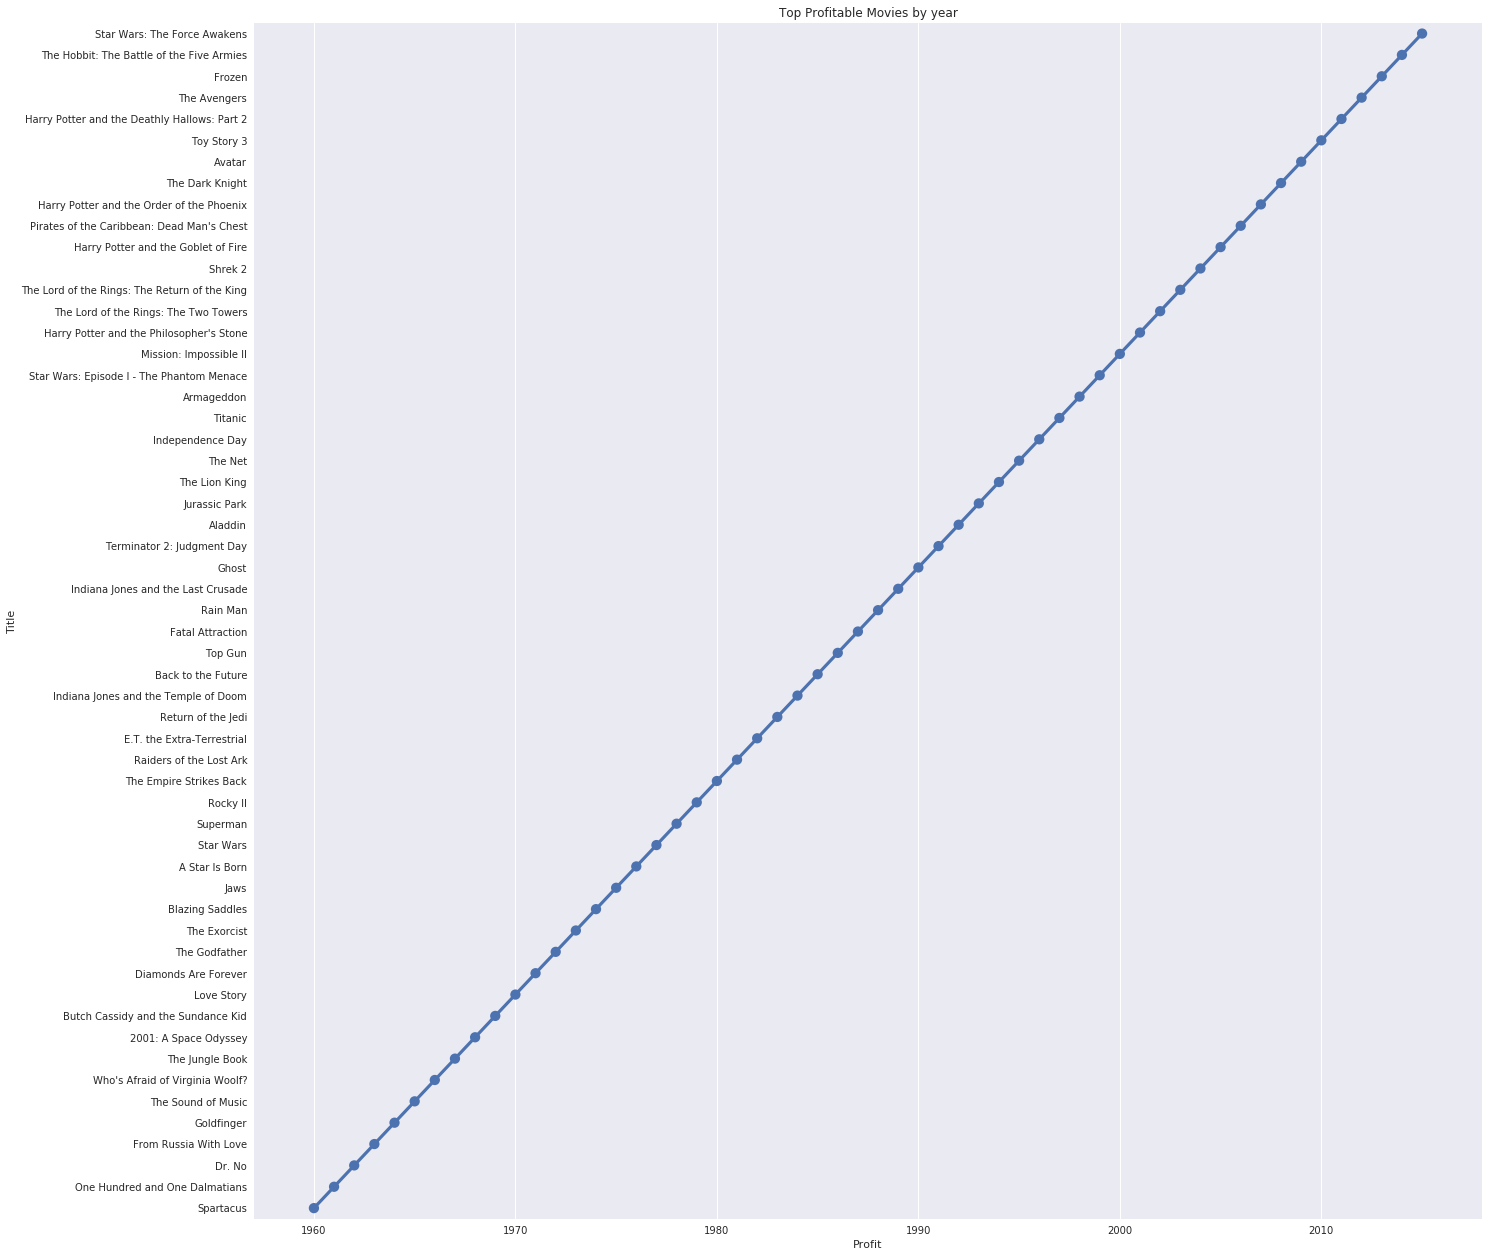

In [21]:
x = df3['original_title']
y = df3['release_year']
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(22,22)})
ax.set_title("Top Profitable Movies by year")
ax.set_xlabel("Profit")
ax.set_ylabel("Title")
sns.set_style("darkgrid")

### Research Question 4  (What is most popular movie?)

In [63]:
df4_max = df['popularity'].idxmax()
   
print('The most popular movie : ', df.loc[df4_max ,'original_title'])

The most popular movie :  Jurassic World


### Research Question 5  (What are highest 10 budgets of movies ?)

In [22]:
df5=df.nlargest(10,['budget'])
df5[['original_title','budget']].head(10)

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
1929,Tangled,260000000
4411,John Carter,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
634,The Hobbit: The Battle of the Five Armies,250000000


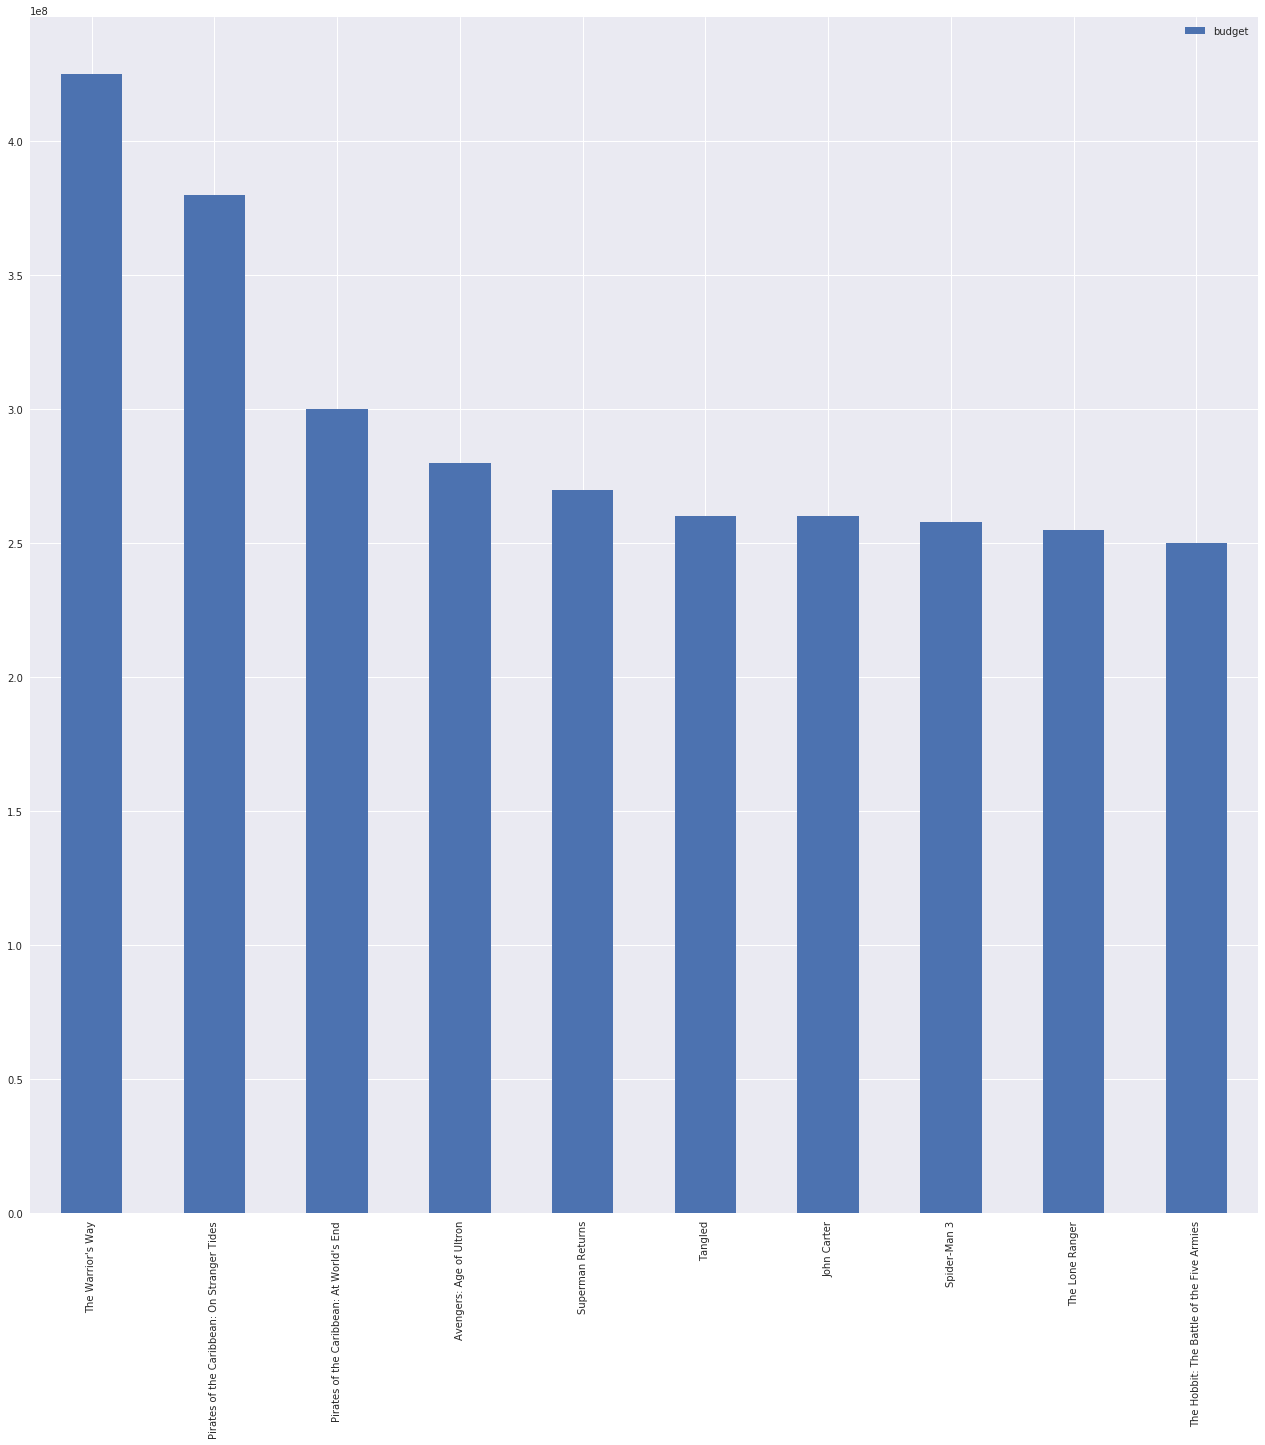

In [28]:
df5[['budget']].plot(kind='bar')
plt.xticks(np.arange(10),df5['original_title'])
plt.show()

### Research Question 6  (What are the revenue of highest 10 budgets of movies ?)

In [23]:
df6 = df5[['original_title','budget' , 'revenue']]
df6.head()

,original_title,budget,revenue
2244,The Warrior's Way,425000000,11087569
3375,Pirates of the Caribbean: On Stranger Tides,380000000,1021683000
7387,Pirates of the Caribbean: At World's End,300000000,961000000
14,Avengers: Age of Ultron,280000000,1405035767
6570,Superman Returns,270000000,391081192


In [24]:
# !pip install plotly

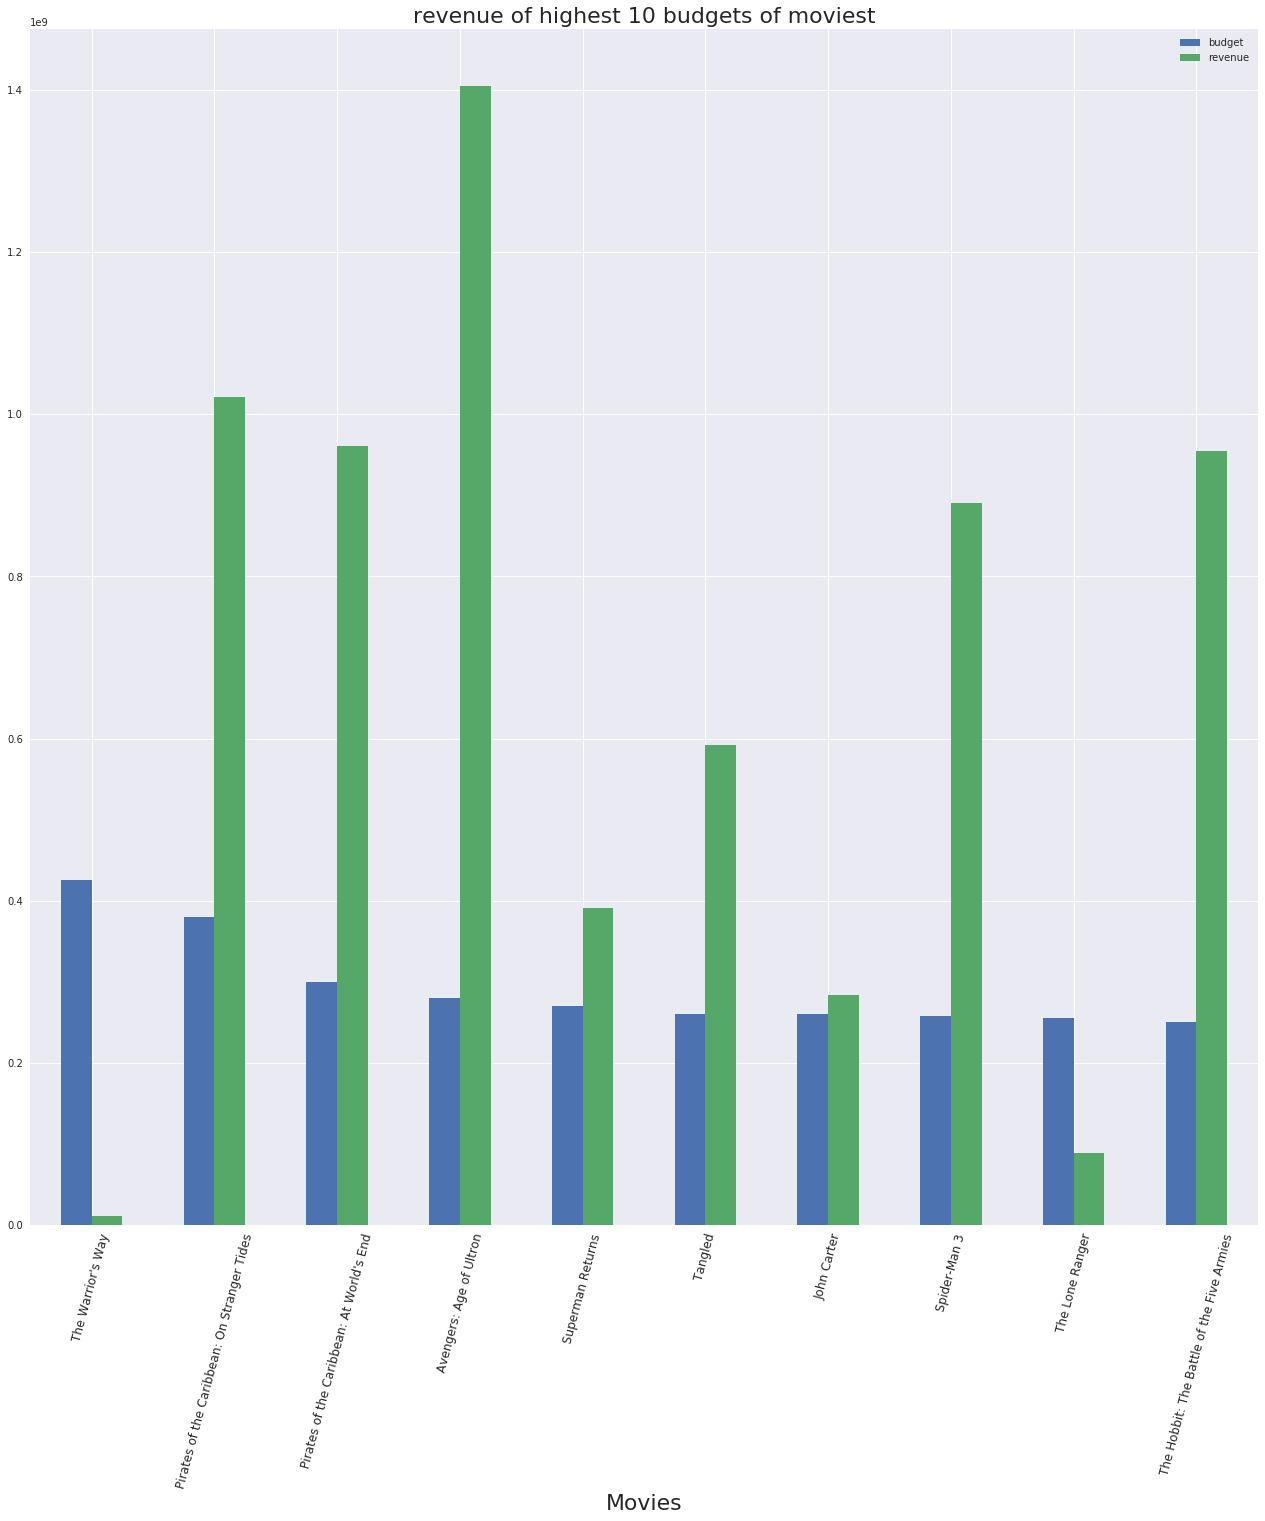

In [26]:
df6[['budget','revenue']].plot(kind='bar')
plt.xticks(np.arange(10),df6['original_title'], rotation=75 , fontsize = 12)
plt.xlabel('Movies', fontsize = 22)
plt.title('revenue of highest 10 budgets of moviest' , fontsize = 22)
plt.show()

### Research Question 7  (What are average counts of movies people votes from year to year ?)

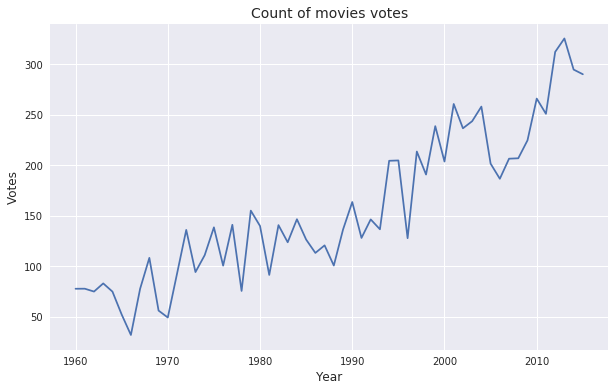

In [33]:
df.groupby('release_year')['vote_count'].mean().plot()
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Count of movies votes",fontsize = 14)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Votes',fontsize = 12)
plt.show()

### Research Question 8  (What are runtime of the highest and lowest 5 profit movies ? )

In [39]:
df8_l=df.nlargest(5,['profit'])
df8_s=df.nsmallest(5,['profit'])
df8 = df8_l.append(df8_s)
df8[['original_title','runtime','profit']].head(10)


,original_title,runtime,profit
1386,Avatar,162,2544505847
3,Star Wars: The Force Awakens,136,1868178225
5231,Titanic,194,1645034188
0,Jurassic World,124,1363528810
4,Furious 7,137,1316249360
2244,The Warrior's Way,100,-413912431
5508,The Lone Ranger,149,-165710090
2069,The Wolfman,102,-150000000
2214,The Pacific,540,-120000000
7031,The Alamo,137,-119180039


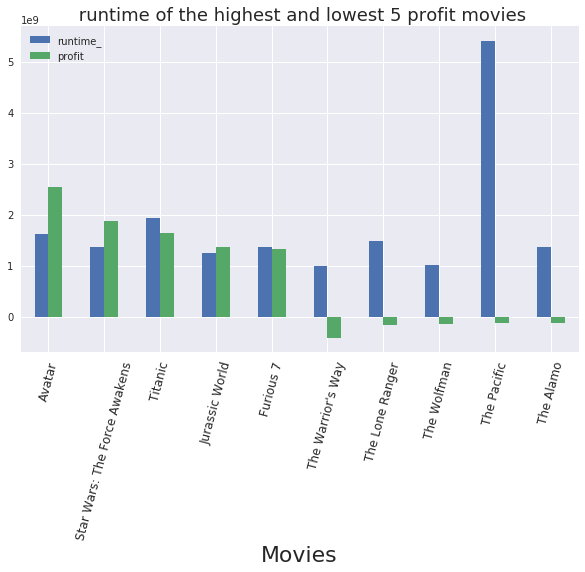

In [47]:
#to normaileze runtime with profite 
df8['runtime_'] = df8['runtime']*10000000
df8[['runtime_','profit']].plot(kind='bar')
plt.xticks(np.arange(10),df8['original_title'], rotation=75 , fontsize = 12)
plt.xlabel('Movies', fontsize = 22)
plt.title(' runtime of the highest and lowest 5 profit movies' , fontsize = 18)
plt.show()

### Research Question 9  (Who are the highest and lowest movies number directors ?)

In [60]:
df9 = df.director.value_counts()
print ('The highest movies number director : ' , df9.iloc[:1])
print ('The lowest movies number director : ',df9.tail(1))

The highest movies number director :  Woody Allen    45
Name: director, dtype: int64
The lowest movies number director :  Jason Winer    1
Name: director, dtype: int64


### Research Question 10  (What are the movies have high vote rate average ?)

In [68]:
df10 = df.nlargest(10,['vote_average'])
df10[['original_title','vote_average']].head(10)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3224,John Mayer: Where the Light Is Live in Los Ang...,8.5
3690,The Art of Flight,8.5
5830,Doctor Who: The Time of the Doctor,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5


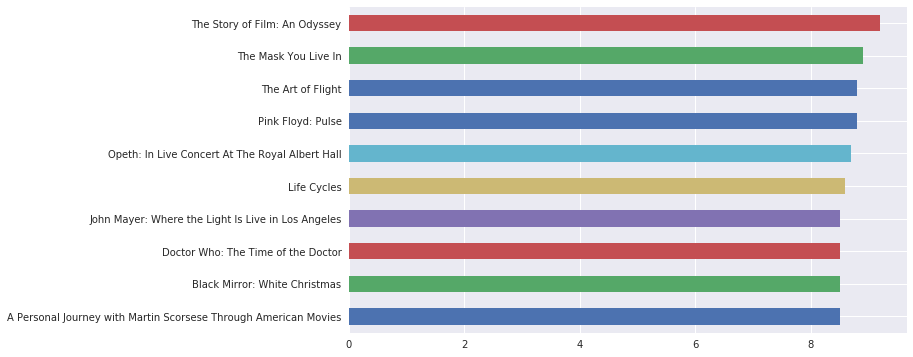

In [75]:
df10['vote_average'].sort_values(ascending=True).plot(kind='barh')
plt.yticks(np.arange(10),df10['original_title'].sort_values(ascending=True))
plt.show()

<a id='conclusions'></a>
## Conclusions
>><ul>
    <li>Action|Adventure|Science Fiction|Thriller are the most popular grouped genres 
    <li>Vote_count and vote_average properties high correlation with are associated with movies that have high revenues
    <li>Avatar , Star Wars: The Force Awakens , Titanic , The Avengers and Jurassic World are the highest revenues movies
    <li>lowest profit movie : The Warrior's Way and Avatar the highest
    <li>Star Wars: The Force Awakens the highest profit movie in 2015 and we show all years highest profit movies
    <li>The most popular movie :  Jurassic World
	<li>The Warrior's Way is the highest budget movie
	<li>Pirates of the Caribbean are the highest budget film series untill year 2015
	<li>The Warrior's Way is the highest budget movie however has low revenue
	<li>Avengers: Age of Ultron is the highest revnue movie
	<li>Average counts of movies people votes increased year by year , may that related to population
	<li>Movies runtime not related with highest profit movies as we see The Pacific movie has high runtime but in lowest profit movies
    <li>2015 is the most profitable year in last 15 years but not the top
    <li>Woody alien is the highest of directors of movies number and Jason Winer the lowest
    <li>The Story of Film: An Odyssey movie is the voted rate however not in highest profit movies
    </ul>

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0